# MNIST CNN

## 1) 필요한 모델을 우선적으로 호출합니다

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random
import matplotlib.pyplot as plt

## 2) manual seed를 고정시킵니다

In [2]:
random.seed(1)
torch.manual_seed(1)

## 3) hyper parameter를 설정합니다

In [3]:
epochs = 15
batch_size = 100
learning_rate = 1e-3

## 4) train, test set을 불러옵니다

In [4]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                         train=True,
                         transform=transforms.ToTensor(),
                         download=False)
mnist_test = dsets.MNIST(root='MNIST_data/',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=False)

## 5) train set을 batch size를 지정하여 data loader에 넣어줍니다

In [5]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                         batch_size=batch_size,
                                         shuffle=True,
                                         drop_last=True)

## 6) CNN architecture를 구성합니다

In [8]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.fc = nn.Linear(7*7*64, 10, bias=True)
        nn.init.xavier_uniform_(self.fc.weight)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        
        return out

## 7) 생성된 모델의 architecture 출력 및 테스트를 합니다

In [ ]:
model = CNN()
model

In [17]:
value = torch.FloatTensor(1, 1, 28, 28)

print(model(value).shape)

torch.Size([1, 10])


## 8) 모델 학습 전 loss function과 optimizer를 선언합니다

In [18]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

## 9) model training을 시작합니다

In [23]:
model.train()
for epoch in range(1, epochs+1):
    avg_loss = 0
    total_batch = len(data_loader)
    
    for x_train, y_train in data_loader:
        prediction = model(x_train)
        
        loss = loss_function(prediction, y_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        avg_loss += loss / total_batch
        
    print('[epoch: {:2d}/{}] loss: {:.4f}'.format(epoch, epochs, avg_loss))

print('Learning finished')

[epoch:  1/15] loss: 0.2195
[epoch:  2/15] loss: 0.0595
[epoch:  3/15] loss: 0.0431
[epoch:  4/15] loss: 0.0350
[epoch:  5/15] loss: 0.0292
[epoch:  6/15] loss: 0.0241
[epoch:  7/15] loss: 0.0205
[epoch:  8/15] loss: 0.0176
[epoch:  9/15] loss: 0.0148
[epoch: 10/15] loss: 0.0126
[epoch: 11/15] loss: 0.0111
[epoch: 12/15] loss: 0.0089
[epoch: 13/15] loss: 0.0079
[epoch: 14/15] loss: 0.0065
[epoch: 15/15] loss: 0.0060
Learning finished


## 10) test set을 이용하여 trained model을 테스트 합니다

accuracy:  0.9890000224113464
Label:  2
Prediction:  2


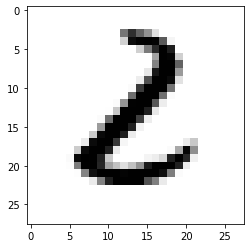

In [28]:
with torch.no_grad():
    x_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float()
    y_test = mnist_test.test_labels
    
    prediction = model(x_test)
    correct = torch.argmax(prediction, 1) == y_test
    accuracy = correct.float().mean()
    print('accuracy: ', accuracy.item())
    
    r = random.randint(1, len(mnist_test)-1)
    x_test_random = mnist_test.test_data[r].view(-1, 1, 28, 28).float()
    y_test_random = mnist_test.test_labels[r]
    prediction_random = model(x_test_random)
    
    print('Label: ', y_test_random.item())
    print('Prediction: ', torch.argmax(prediction_random, 1).item())
    
    plt.imshow(mnist_test.test_data[r].view(28,28), cmap='Greys', interpolation='nearest')
    plt.show()

# Full code

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random
import matplotlib.pyplot as plt

random.seed(1)
torch.manual_seed(1)

batch_size = 100
epochs = 15
learning_rate = 1e-3

mnist_train = dsets.MNIST(root='MNIST_data/',
                         train=True,
                         transform=transforms.ToTensor(),
                         download=False)
mnist_test = dsets.MNIST(root='MNIST_data/',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=False)

data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                         batch_size=batch_size,
                                         shuffle=True,
                                         drop_last=True)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1), 
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.fc = nn.Linear(7*7*64, 10, bias=True)
        nn.init.xavier_uniform_(self.fc.weight)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        
        return out
    
model = CNN()
# value = torch.FloatTensor(1, 1, 28, 28)
# model(value).shape

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

model.train()
for epoch in range(1, epochs+1):
    avg_loss = 0
    total_batch = len(data_loader)
    
    for x_train, y_train in data_loader:        
        prediction = model(x_train)
        
        loss = loss_function(prediction, y_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        avg_loss += loss / total_batch
    
    print('epoch: {:2d}/{} >>> loss: {:.6f}'.format(epoch, epochs, avg_loss))    

print('Learning finished')

epoch:  1/15 >>> loss: 0.219523
epoch:  2/15 >>> loss: 0.059500
epoch:  3/15 >>> loss: 0.043120
epoch:  4/15 >>> loss: 0.034964
epoch:  5/15 >>> loss: 0.029212
epoch:  6/15 >>> loss: 0.024081
epoch:  7/15 >>> loss: 0.020534
epoch:  8/15 >>> loss: 0.017575
epoch:  9/15 >>> loss: 0.014786
epoch: 10/15 >>> loss: 0.012596
epoch: 11/15 >>> loss: 0.011091
epoch: 12/15 >>> loss: 0.008926
epoch: 13/15 >>> loss: 0.007890
epoch: 14/15 >>> loss: 0.006487
epoch: 15/15 >>> loss: 0.006021
Learning finished


C:\Users\Dojun Park\AppData\Local\Continuum\anaconda3\envs\python36\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\Dojun Park\AppData\Local\Continuum\anaconda3\envs\python36\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


accuracy:  0.9890000224113464
Label:  4
Prediction:  4


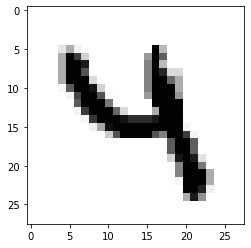

In [47]:
with torch.no_grad():
    
    x_test = mnist_test.test_data.view(len(mnist_test), -1, 28, 28).float()
    y_test = mnist_test.test_labels
    
    prediction = model(x_test)
    correct = torch.argmax(prediction, 1) == y_test
    accuracy = correct.float().mean()
    print('accuracy: ', accuracy.item())
    
    r = random.randint(0, len(mnist_test)-1)
    x_test_r = x_test[r].view(-1, 1, 28, 28)
    y_test_r = y_test[r]
    prediction_r = model(x_test_r)
    
    print('Label: ', y_test_r.item())
    print('Prediction: ', torch.argmax(prediction_r, 1).item())
    
    plt.imshow(x_test_r.view(28, 28), cmap='Greys')
    plt.show()